In [1]:
!pip install uncertainties
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy as s
import pandas as pd
import uncertainties as unc

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def linfunc(x,A,B):
    return A*x + B

In [3]:
inc_rad = 0.02/2

# Caracterización

In [4]:
A = np.array([-1980,-1540,-1140,-760,-360,464,816,1230,1660,2080])*1e-3
rad1 = -np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0.1,0.2,0.3,0.4,0.5])

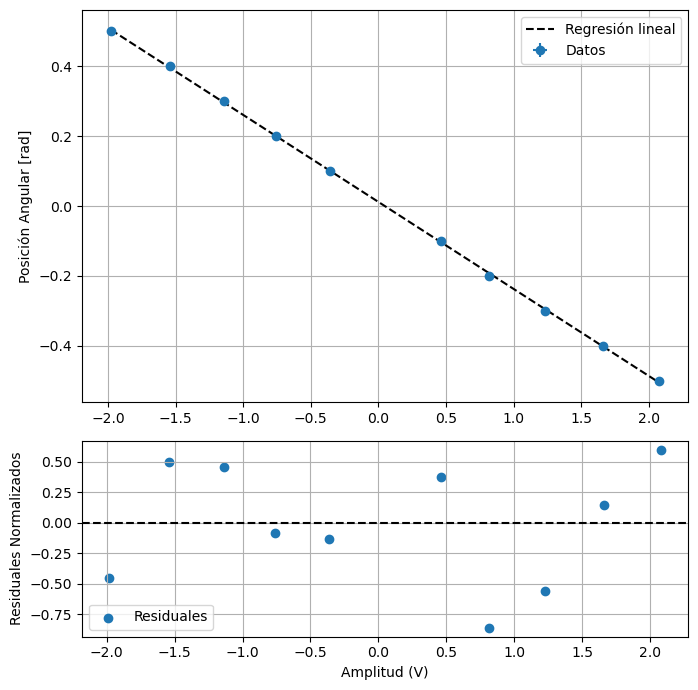

In [5]:
params1, pcov1 = s.optimize.curve_fit(linfunc,A,rad1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(A,rad1,fmt="o",xerr=np.array([0.01]*len(A)),yerr=np.array([inc_rad]*len(A)),label="Datos")
ax1.plot(A, linfunc(A,*params1),color="k",label="Regresión lineal",linestyle="--")
ax1.set_ylabel("Posición Angular [rad]")
ax1.legend()
ax1.grid(True)

residuals1 = (rad1 - linfunc(A,*params1))/np.array([inc_rad]*len(A))

ax2.scatter(A, residuals1,label="Residuales")
ax2.set_ylabel("Residuales Normalizados")
ax2.set_xlabel("Amplitud (V)")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [6]:
params1, np.sqrt(np.diag(pcov1))

(array([-0.24889648,  0.01169813]), array([0.00126149, 0.00168184]))

In [7]:
adjust = params1[1]

# Actividad 1

In [8]:
rad2 = -np.array([1.34,2.18,2.6,2.8,3.22,3.42,3.82,4.62]) + adjust
mass = np.array([-400,-200,-100,-50,50,100,200,400])
torque = 2*mass*9.81*12.6e-3/1000
torque

array([-0.0988848, -0.0494424, -0.0247212, -0.0123606,  0.0123606,
        0.0247212,  0.0494424,  0.0988848])

In [9]:
inc_torque = []
for i in mass:
    tork = 2*i*9.81*unc.ufloat(12.6e-3,2.5e-5)/1000
    inc_torque.append(tork.std_dev)

inc_torque

[0.0001962,
 9.81e-05,
 4.905e-05,
 2.4525e-05,
 2.4525e-05,
 4.905e-05,
 9.81e-05,
 0.0001962]

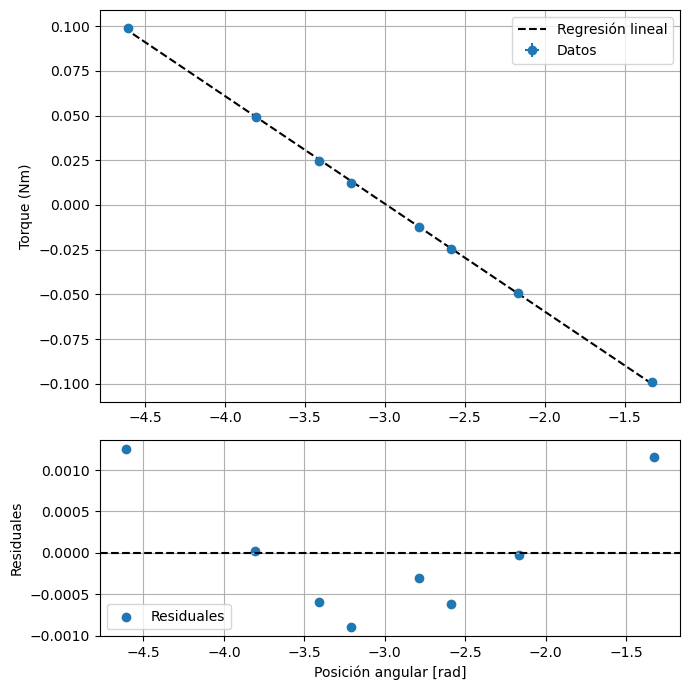

In [10]:
params2, pcov2 = s.optimize.curve_fit(linfunc,rad2,torque)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(rad2,torque,fmt="o",xerr=np.array([inc_rad]*len(rad2)),yerr=inc_torque,label="Datos")
ax1.plot(rad2, linfunc(rad2,*params2),color="k",label="Regresión lineal",linestyle="--")
ax1.set_ylabel("Torque (Nm)")
ax1.legend()
ax1.grid(True)

residuals2 = (torque - linfunc(rad2,*params2))

ax2.scatter(rad2, residuals2,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Posición angular [rad]")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()


In [11]:
params2
inc2 = np.sqrt(np.diag(pcov2))
params2, inc2

(array([-0.06026778, -0.18009832]), array([0.00032528, 0.00101952]))

In [12]:
-params2[0],  inc2[0]

(0.060267779458847905, 0.00032528155392534756)

# Actividad 2

In [13]:
N = np.array([0,2,4,6,8])
T = np.array([1.16,1.3,1.44,1.56,1.68])
T_scale = T/(2*np.pi)
T_scale_2 = T_scale**2

In [14]:
sigma_T_scale_2 = []

for i in T:
    new_T = (unc.ufloat(i,0.01)/(2*np.pi))**2
    sigma_T_scale_2.append(new_T.std_dev)

sigma_T_scale_2

[0.000587662865125559,
 0.0006585876936751957,
 0.0007295125222248319,
 0.0007903052324102348,
 0.0008510979425956374]

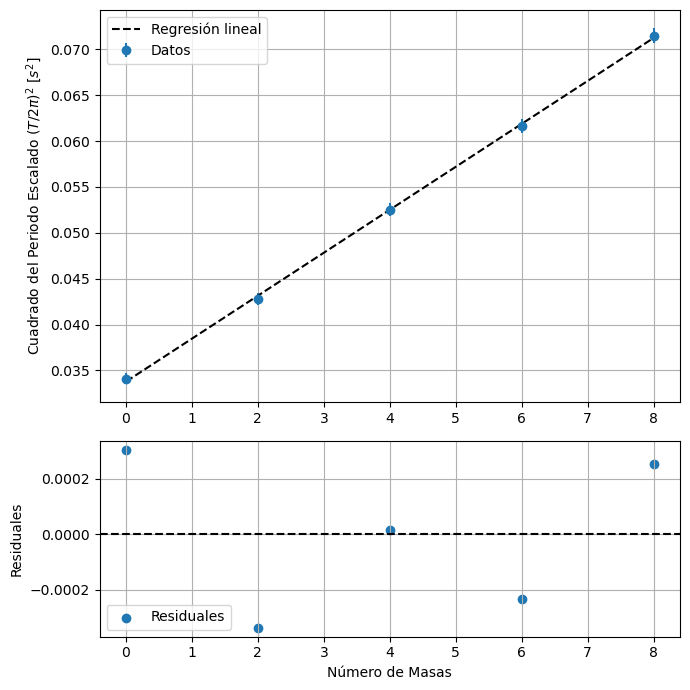

In [15]:
params3, pcov3 = s.optimize.curve_fit(linfunc,N,T_scale_2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(N,T_scale_2,fmt="o",yerr=sigma_T_scale_2,label="Datos")
ax1.plot(N, linfunc(N,*params3),color="k",label="Regresión lineal",linestyle="--")
ax1.set_ylabel("Cuadrado del Periodo Escalado $(T/2 \pi)^2$ $[s^2]$")
ax1.legend()
ax1.grid(True)

residuals3 = (T_scale_2 - linfunc(N,*params3))

ax2.scatter(N, residuals3,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Número de Masas")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [16]:
params3, np.sqrt(np.diag(pcov3))

(array([0.00468256, 0.03378048]), array([5.19141315e-05, 2.54326264e-04]))

In [17]:
inc3 =np.sqrt(np.diag(pcov3))

In [18]:
R2 = unc.ufloat(0.047,0.000025) #metros
R1 = unc.ufloat(0.022,0.000025)
R = unc.ufloat(0.126/2,0.000025)
h = unc.ufloat(0.0099,0.000025)
M = 0.212
m = np.pi*R**2*h*8960

delta_I = M * (R1**2 + R2**2)/2
I = m *R**2 /2
kappa_teo = 0.058

delta_I, I

(0.000285458+/-2.7503885180097735e-07,
 0.002194953272260567+/-6.546860395706673e-06)

In [19]:
delta_I_exp = params3[0]*kappa_teo
inc_delta_I_exp = np.sqrt(np.diag(pcov3))[0]*kappa_teo

delta_I_exp, inc_delta_I_exp

(0.00027158839311017984, 3.0110196273272747e-06)

In [20]:
I_exp = params3[1]*kappa_teo
inc_I_exp = np.sqrt(np.diag(pcov3))[1]*kappa_teo
I_exp, inc_I_exp

(0.0019592679923590033, 1.4750923285160937e-05)

In [21]:
kappa_teo2 = I/unc.ufloat(params3[1], inc3[1])
kappa_teo3 = delta_I/unc.ufloat(params3[0], inc3[0])

kappa_teo2, kappa_teo3

(0.0649769660340503+/-0.0005261896803545351,
 0.06096197193995408+/-0.0006784147171565693)

# Actividad 3

In [22]:
sigma_I = 0.01
I1 = np.array([-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.24, 0, 0.24, 0.5, 0.75, 1, 1.26, 1.5, 1.75, 2])

In [23]:
rad3 = np.array([2.12, 2.18, 2.26, 2.34, 2.42, 2.54, 2.68, 2.84, 3, 3.22, 3.32, 3.46, 3.58, 3.68, 3.74, 3.82, 3.88]) + adjust
params4, pcov4 = s.optimize.curve_fit(linfunc,I1,rad3)

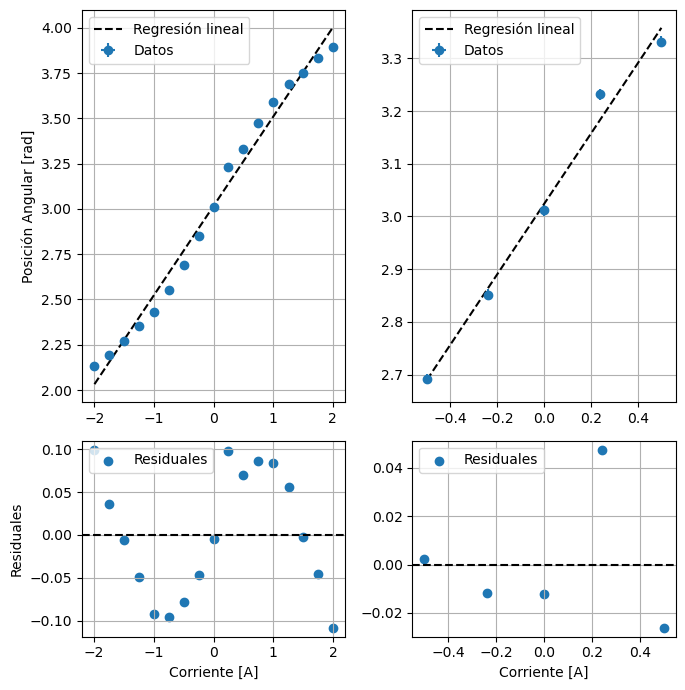

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(I1,rad3,fmt="o",xerr=np.array([0.01]*len(I1)),yerr=np.array([inc_rad]*len(I1)),label="Datos")
ax1.plot(I1, linfunc(I1,*params4),color="k",label="Regresión lineal",linestyle="--")
ax1.set_ylabel("Posición Angular [rad]")
ax1.legend()
ax1.grid(True)

residuals4 = rad3 - linfunc(I1,*params4)

ax3.scatter(I1, residuals4,label="Residuales")
ax3.set_ylabel("Residuales")
ax3.set_xlabel("Corriente [A]")
ax3.axhline(0,color="k",linestyle="--")
ax3.legend()
ax3.grid(True)

params41, pcov41 = s.optimize.curve_fit(linfunc,I1[6:11],rad3[6:11])

ax2.errorbar(I1[6:11],rad3[6:11],fmt="o",xerr=np.array([0.01]*len(I1))[6:11]
             ,yerr=np.array([inc_rad]*len(I1))[6:11],label="Datos")
ax2.plot(I1[6:11], linfunc(I1[6:11],*params41),color="k",label="Regresión lineal",linestyle="--")
ax2.legend()
ax4.set_xlabel("Corriente [A]")
ax2.grid(True)

residuals41 = rad3 - linfunc(I1,*params41)

ax4.scatter(I1[6:11], residuals41[6:11],label="Residuales")
ax4.axhline(0,color="k",linestyle="--")
ax4.legend()
ax4.grid(True)

plt.tight_layout()

In [25]:
params41, np.sqrt(np.diag(pcov41))

(array([0.66840052, 3.02369813]), array([0.04185829, 0.01468266]))

In [26]:
params4, np.sqrt(np.diag(pcov4))

(array([0.49197759, 3.01611462]), array([0.01494222, 0.0183059 ]))

In [27]:
k_teo = 3234e-6
mu_teo1 = params4[0]*kappa_teo/k_teo 
sigma_mu_teo1 = np.sqrt(np.diag(pcov4))[0]*kappa_teo/k_teo

mu_teo1, sigma_mu_teo1

(8.823345785250526, 0.2679804546962849)

In [28]:
mu_teo2 = params41[0]*kappa_teo/k_teo
sigma_mu_teo2 = np.sqrt(np.diag(pcov41))[0]*kappa_teo/k_teo

mu_teo2, sigma_mu_teo2

(11.987393373237698, 0.7507052524098216)

# ACTIVIDAD 4

In [29]:
def subamort(x,A,B,C,D,E):
    return A*np.exp(B*x/2)*np.cos(C*x + D) + E

In [30]:
data_sub1 = pd.read_excel(io = "Datos.xlsx", sheet_name = 1,engine="openpyxl", names=["t", "V"], header=None)
index1 = np.argmax(data_sub1["V"])
data_sub1 = data_sub1[index1-28:1500].reset_index()

time1 = data_sub1["t"].to_numpy()
time1 = time1 - data_sub1["t"][0]

V1 = data_sub1["V"].to_numpy()

In [31]:
params5, pcov5 = s.optimize.curve_fit(subamort,time1,V1,maxfev = 10000)

In [32]:
params5, np.sqrt(np.diag(pcov5))

(array([ 1.60927097, -0.30644509,  5.40520643, -1.58107669,  0.47864132]),
 array([0.00664799, 0.00210962, 0.00103853, 0.00407337, 0.00160074]))

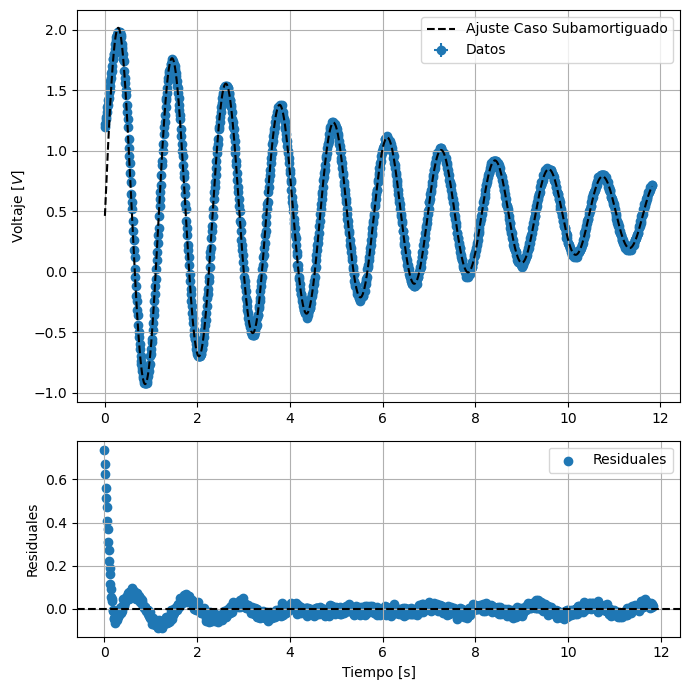

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(time1, V1,fmt="o",xerr= [0.01]*len(time1),yerr=[0.01]*len(V1),label="Datos",zorder=1)
ax1.plot(time1, subamort(time1,*params5),color="k",label="Ajuste Caso Subamortiguado",linestyle="--",zorder=2)
ax1.set_ylabel("Voltaje $[V]$")
ax1.legend()
ax1.grid(True)

residuals5 = (V1 - subamort(time1,*params5))

ax2.scatter(time1, residuals5,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Tiempo [s]")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [35]:
Q1 = np.sqrt(params5[2]**2+(params5[1]/2)**2)/np.abs(params5[1])
Q1

NameError: name 'Q1_' is not defined

In [ ]:
data_sub2 = pd.read_excel(io = "Datos.xlsx", sheet_name = "Sub2",engine="openpyxl", names=["t", "V"], header=None)

index2 = np.argmax(data_sub2["V"])
data_sub2 = data_sub2[index2-27:800].reset_index()

time2 = data_sub2["t"].to_numpy()
time2 = time2 - data_sub2["t"][0]

V2 = data_sub2["V"].to_numpy()

In [ ]:
params6, pcov6 = s.optimize.curve_fit(subamort,time2,V2,maxfev = 20000)

params6, np.sqrt(np.diag(pcov6))

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(time2, V2,fmt="o",xerr= [0.01]*len(time2),yerr=[0.01]*len(V2),label="Datos",zorder=1)
ax1.plot(time2, subamort(time2,*params6),color="k",label="Ajuste Caso Subamortiguado",linestyle="--",zorder=2)
ax1.set_ylabel("Voltaje $[V]$")
ax1.legend()
ax1.grid(True)

residuals6 = (V2 - subamort(time2,*params6))

ax2.scatter(time2, residuals6,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Tiempo [s]")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [36]:
Q2 = np.sqrt(params6[2]**2+(params6[1]/2)**2)/np.abs(params6[1])
Q2

NameError: name 'params6' is not defined

In [37]:
data_sub3 = pd.read_excel(io = "Datos.xlsx", sheet_name = "Sub3",engine="openpyxl", names=["t", "V"], header=None)

index3 = np.argmax(data_sub3["V"])
data_sub3 = data_sub3[index3-14:800].reset_index()

time3 = data_sub3["t"].to_numpy()
time3 = time3 - data_sub3["t"][0]

V3 = data_sub3["V"].to_numpy()

In [38]:
params7, pcov7 = s.optimize.curve_fit(subamort,time3,V3,maxfev = 20000)

params7, np.sqrt(np.diag(pcov7))

(array([-3.34914746, -0.76138358,  5.39674061,  7.86203901,  0.46803239]),
 array([0.00731939, 0.00233519, 0.00114111, 0.00210838, 0.00109168]))

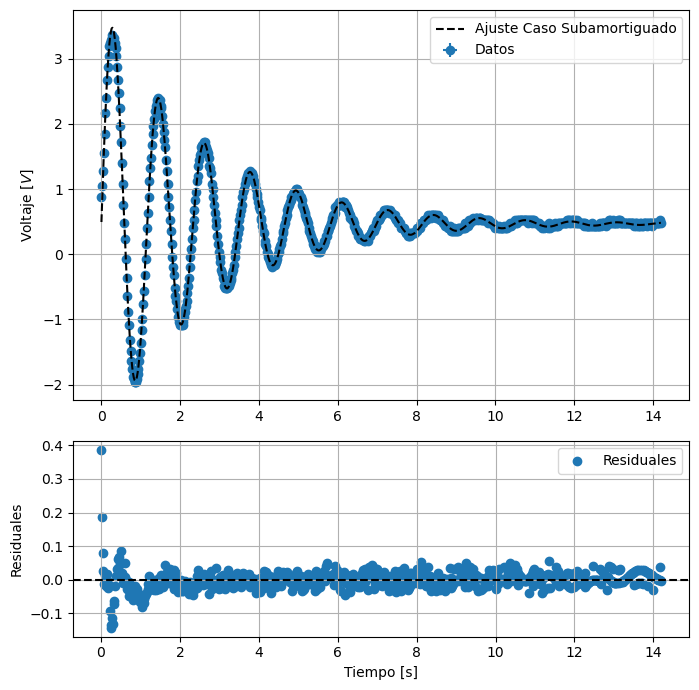

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(time3, V3,fmt="o",xerr= [0.01]*len(time3),yerr=[0.01]*len(V3),label="Datos",zorder=1)
ax1.plot(time3, subamort(time3,*params7),color="k",label="Ajuste Caso Subamortiguado",linestyle="--",zorder=2)
ax1.set_ylabel("Voltaje $[V]$")
ax1.legend()
ax1.grid(True)

residuals7 = (V3 - subamort(time3,*params7))

ax2.scatter(time3, residuals7,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Tiempo [s]")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [40]:
Q3 = np.sqrt(params7[2]**2+(params7[1]/2)**2)/np.abs(params7[1])
Q3

7.105684061776789

In [41]:
def critic(x,A,B,C,D):
    return np.exp(-A*x)*(B + C*x) + D

def sobreamort(x,A,B,C,D,E):
    #lambda_1 = np.abs(-C + np.sqrt(C**2 - D**2 ))
    #lambda_2 = np.abs(-C - np.sqrt(C**2 - D**2 ))
    return (A*np.exp(-C*x) + B*np.exp(-D*x) ) + E

In [42]:
data_crit = pd.read_excel(io = "Datos.xlsx", sheet_name = "Crit",engine="openpyxl", names=["t", "V"], header=None)

data_crit = data_crit[115:250].reset_index()

time4 = data_crit["t"].to_numpy() - data_crit["t"][0]
V4 = data_crit["V"].to_numpy()

In [43]:
#plt.scatter(time4, V4)

In [44]:
#params8, pcov8 = s.optimize.curve_fit(sobreamort,time4,V4,p0=[2,0.1,0.1,0.1,0.5],maxfev = 200000)
#params8, np.sqrt(np.diag(pcov8))

#plt.plot(time4,sobreamort(time4,*params8),color="orange")

In [45]:
data_sobre = pd.read_excel(io = "Datos.xlsx", sheet_name = "Sobre",engine="openpyxl", names=["t", "V"], header=None)
data_sobre = data_sobre[201:350].reset_index()

In [46]:
time5 = data_sobre["t"].to_numpy() - data_sobre["t"][0]
V5 = data_sobre["V"].to_numpy()

#plt.scatter(time5,V5)

In [47]:
#params81, pcov81 = s.optimize.curve_fit(critic,time5,V5,maxfev = 10000)

#params81, np.sqrt(np.diag(pcov8))

In [48]:
#plt.plot(time5,critic(time5,*params81),color="orange")
#plt.scatter(time5, V5)

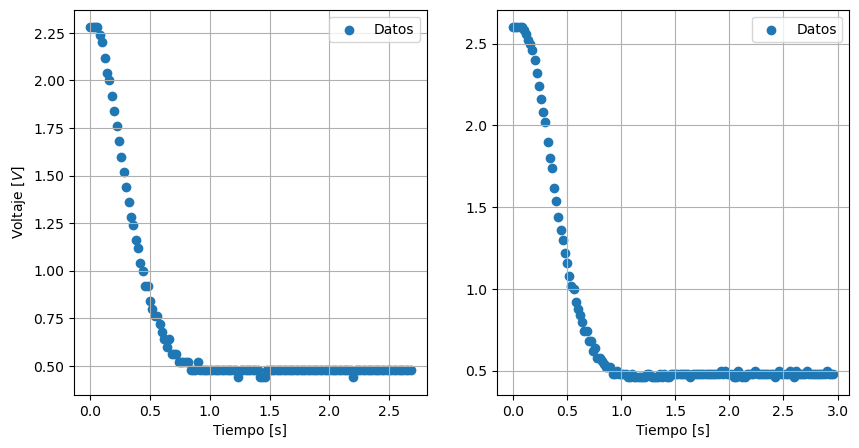

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(time4,V4,label="Datos")
ax1.set_ylabel("Voltaje $[V]$")
ax1.set_xlabel("Tiempo [s]")
ax1.legend()
ax1.grid(True)

ax2.scatter(time5, V5,label="Datos")
ax2.set_xlabel("Tiempo [s]")
ax2.legend()
ax2.grid(True)


# ACTIVIDAD 5

In [50]:
def Lorentzian(x,A,B,C):
    return A/np.sqrt((B**2-x**2)**2 + (C*x)**2)

In [51]:
f_graph = np.linspace(0.7,1,100)

In [52]:
data_res = pd.read_excel(io = "Datos.xlsx", sheet_name = "Resonancia",engine="openpyxl")
data_res

,f1 (mHz),Vpp1 (mV),f2 (mHz),Vpp2 (mV),f3 (mHz),Vpp3 (mV)
0,700,262,700,328,700,188
1,720,274,720,368,720,192
2,740,290,740,408,740,196
3,760,306,760,464,760,200
4,780,318,780,528,780,200
5,800,332,800,608,800,204
6,820,336,820,720,820,204
7,840,340,840,816,840,200
8,860,336,860,864,860,192
9,880,324,880,808,880,188


In [53]:
params9, pcov9 = s.optimize.curve_fit(Lorentzian,data_res["f1 (mHz)"]*1e-3,data_res["Vpp1 (mV)"]*1e-3/2,maxfev = 1000)
params9, np.sqrt(np.diag(pcov9))

(array([0.04329791, 0.86400283, 0.30000764]),
 array([0.00024078, 0.00049101, 0.00199908]))

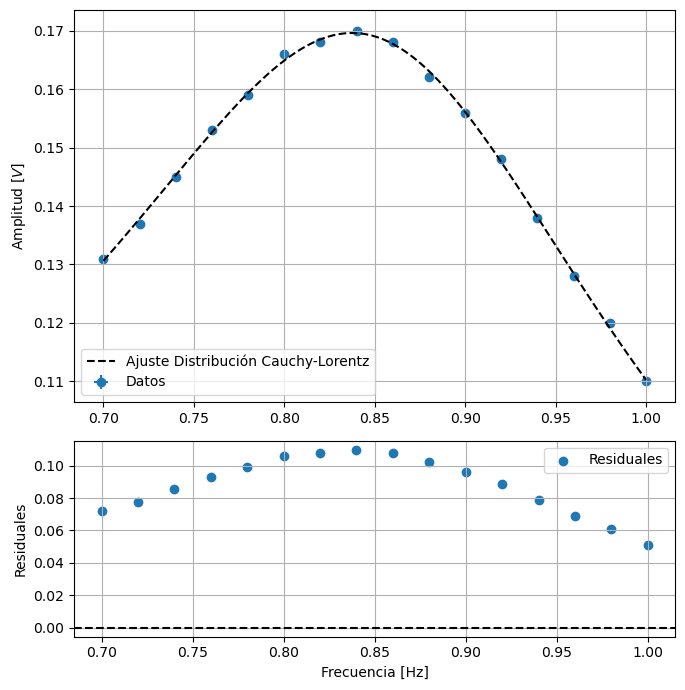

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(data_res["f1 (mHz)"]*1e-3,data_res["Vpp1 (mV)"]*1e-3/2, fmt="o",
             xerr= [0.001]*16,yerr=[0.001/2]*16,label="Datos",zorder=1)
ax1.plot(f_graph, Lorentzian(f_graph,*params9),color="k",label="Ajuste Distribución Cauchy-Lorentz",linestyle="--",zorder=2)
ax1.set_ylabel("Amplitud $[V]$")
ax1.legend()
ax1.grid(True)

residuals7 = data_res["Vpp1 (mV)"]*1e-3/2 - Lorentzian(data_res["Vpp1 (mV)"]*1e-3/2,*params9)

ax2.scatter(data_res["f1 (mHz)"]*1e-3, residuals7,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [55]:
params10, pcov10 = s.optimize.curve_fit(Lorentzian,data_res["f2 (mHz)"]*1e-3,data_res["Vpp2 (mV)"]*1e-3/2,maxfev = 1000)

params10, np.sqrt(np.diag(pcov10))

(array([0.04358275, 0.86312838, 0.11785413]),
 array([0.00021546, 0.00031241, 0.00083395]))

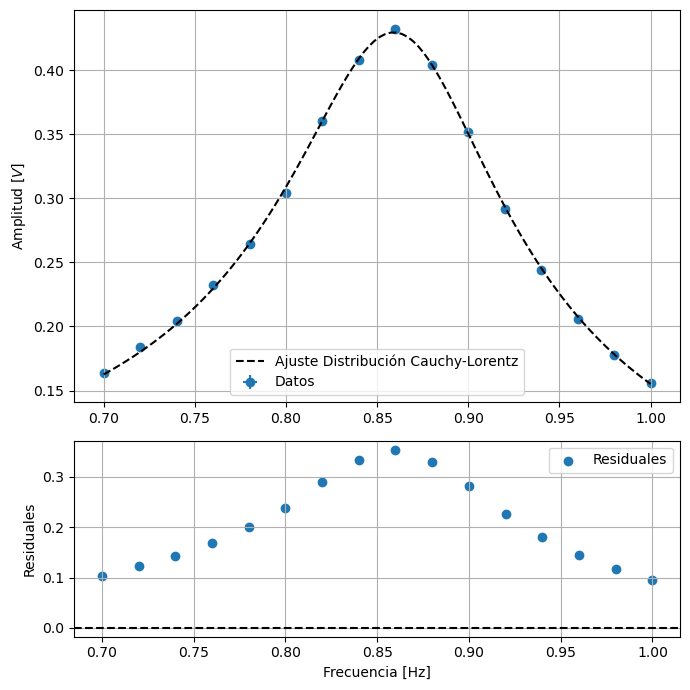

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(data_res["f2 (mHz)"]*1e-3,data_res["Vpp2 (mV)"]*1e-3/2, fmt="o",
             xerr= [0.001]*16,yerr=[0.001]*16,label="Datos",zorder=1)
ax1.plot(f_graph, Lorentzian(f_graph,*params10),color="k",label="Ajuste Distribución Cauchy-Lorentz",linestyle="--",zorder=2)
ax1.set_ylabel("Amplitud $[V]$")
ax1.legend()
ax1.grid(True)

residuals8 = data_res["Vpp2 (mV)"]*1e-3/2 - Lorentzian(data_res["Vpp2 (mV)"]*1e-3/2,*params10)

ax2.scatter(data_res["f2 (mHz)"]*1e-3, residuals8,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [57]:
params11, pcov11 = s.optimize.curve_fit(Lorentzian,data_res["f3 (mHz)"]*1e-3,data_res["Vpp3 (mV)"]*1e-3/2,maxfev = 1000)

params11, np.sqrt(np.diag(pcov11))

(array([ 0.04263662, -0.87437119,  0.50794878]),
 array([0.00162381, 0.00388689, 0.02097016]))

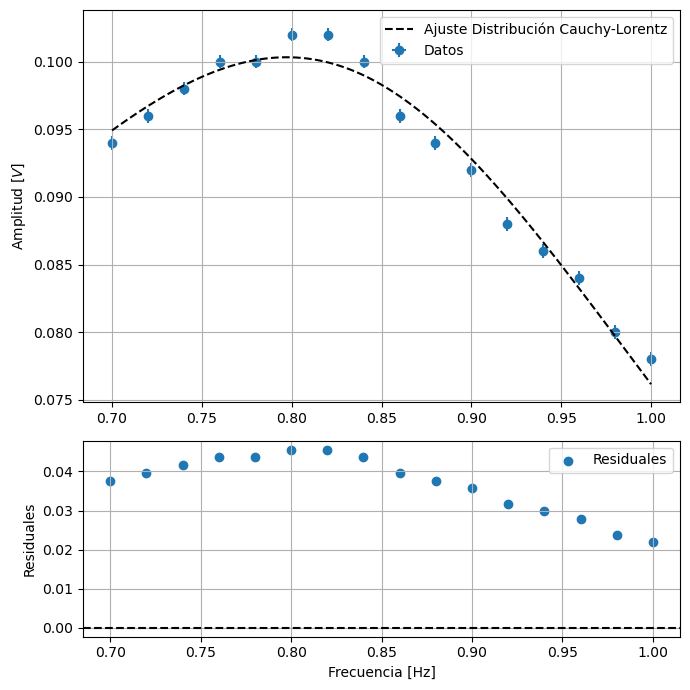

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [2, 1]})

ax1.errorbar(data_res["f3 (mHz)"]*1e-3,data_res["Vpp3 (mV)"]*1e-3/2, fmt="o",
             xerr= [0.001]*16,yerr=[0.001/2]*16,label="Datos",zorder=1)
ax1.plot(f_graph, Lorentzian(f_graph,*params11),color="k",label="Ajuste Distribución Cauchy-Lorentz",linestyle="--",zorder=2)
ax1.set_ylabel("Amplitud $[V]$")
ax1.legend()
ax1.grid(True)

residuals9 = data_res["Vpp3 (mV)"]*1e-3/2 - Lorentzian(data_res["Vpp3 (mV)"]*1e-3/2,*params11)

ax2.scatter(data_res["f3 (mHz)"]*1e-3, residuals9,label="Residuales")
ax2.set_ylabel("Residuales")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.axhline(0,color="k",linestyle="--")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

In [59]:
frec1 = unc.ufloat(np.abs(params9[1]), np.sqrt(np.diag(pcov9)[1]))
frec2 = unc.ufloat(np.abs(params10[1]), np.sqrt(np.diag(pcov10)[1]))
frec3 = unc.ufloat(np.abs(params11[1]), np.sqrt(np.diag(pcov11)[1]))

gamma1 = unc.ufloat(np.abs(params9[2]), np.sqrt(np.diag(pcov9)[2]))
gamma2 = unc.ufloat(np.abs(params10[2]), np.sqrt(np.diag(pcov10)[2]))
gamma3 = unc.ufloat(np.abs(params11[2]), np.sqrt(np.diag(pcov11)[2]))

In [60]:
Q1_ = 2*np.pi*frec1/gamma1
Q2_ = 2*np.pi*frec2/gamma2
Q3_ = 2*np.pi*frec3/gamma3

In [61]:
Q1_,Q2_,Q3_

(18.09517217699056+/-0.12101351638576877,
 46.01616956414669+/-0.32604226510843926,
 10.815728698649387+/-0.44909769408498706)

In [62]:
frec1, frec2, frec3

(0.8640028292305525+/-0.0004910074559931698,
 0.8631283849070492+/-0.00031240623702646875,
 0.8743711923780598+/-0.0038868901881801148)

In [63]:
(frec1 + frec2 + frec3)/3

0.8671674688385539+/-0.0013100721487233173

In [65]:
(frec1 + frec2 + frec3)/3 * 2*np.pi

5.448573899070514+/-0.008231426076203537